In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [ ]:
df=pd.read_csv('/content/songs_normalize.csv')
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


In [ ]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


here we are performing an analysis of dancebility to popularity,to find whether there is any significant relationship between them

when the popularity factor is greater than 80 its consider that the song is quite famous

h0(null hypothesis):the popularity of song increases when the dancebility is high.
h1(alternate hypothesis): the popularity of the song has no connection with the dancebility.

In [ ]:
bpr_pop = df[['danceability', 'popularity']]
bpr_pop

,danceability,popularity
0,0.751,77
1,0.434,79
2,0.529,66
3,0.551,78
4,0.614,65
...,...,...
1995,0.842,79
1996,0.552,78
1997,0.847,69
1998,0.741,75


In [ ]:
bpr_pop['popularity']>=80  #considering popularity greater than 80 as the popular songs
bpr_pop.mean()

danceability     0.667438
popularity      59.872500
dtype: float64

In [ ]:
bpr_nonpop=bpr_pop['popularity']<=80 
bpr_nonpop.mean()

0.954

In [ ]:
bpr_updated_pop = bpr_pop['danceability'] [bpr_pop['popularity']>80]
bpr_updated_pop.mean()

0.6837282608695652

In [ ]:
bpr_updated_non_pop = bpr_pop['danceability'] [bpr_pop['popularity']<=80]
bpr_updated_non_pop

0       0.751
1       0.434
2       0.529
3       0.551
4       0.614
        ...  
1994    0.580
1995    0.842
1996    0.552
1997    0.847
1998    0.741
Name: danceability, Length: 1908, dtype: float64

In [ ]:
bpr_updated_pop.mean()


0.6837282608695652

In [ ]:
bpr_updated_pop.mean()

0.6837282608695652

In [ ]:
observed_bpr_diff=bpr_updated_pop.mean()-bpr_updated_non_pop.mean()
observed_bpr_diff

0.01707626925530925

In [ ]:
bpr_pop

,danceability,popularity
0,0.751,77
1,0.434,79
2,0.529,66
3,0.551,78
4,0.614,65
...,...,...
1995,0.842,79
1996,0.552,78
1997,0.847,69
1998,0.741,75


In [ ]:
shuffled=bpr_pop.sample(2000)
shuffled

,danceability,popularity
539,0.666,58
1381,0.574,78
935,0.480,64
875,0.680,74
567,0.933,57
...,...,...
938,0.657,3
530,0.690,62
272,0.675,64
715,0.630,67


In [ ]:
shuffled_bpr = shuffled['popularity']

In [ ]:
original_and_shuffled= bpr_pop.assign(shuffled_bpr=shuffled_bpr.values )
original_and_shuffled

,danceability,popularity,shuffled_bpr
0,0.751,77,58
1,0.434,79,78
2,0.529,66,64
3,0.551,78,74
4,0.614,65,57
...,...,...,...
1995,0.842,79,3
1996,0.552,78,62
1997,0.847,69,64
1998,0.741,75,67


In [ ]:
shuffledbpr_updated = original_and_shuffled['danceability'] [original_and_shuffled['shuffled_bpr']>=80]
shuffledbpr_updated 

7       0.708
16      0.761
35      0.813
38      0.478
51      0.630
        ...  
1944    0.796
1952    0.794
1972    0.795
1985    0.746
1993    0.744
Name: danceability, Length: 135, dtype: float64

In [ ]:
shuffledbpr_updated.mean()

0.6872518518518518

In [ ]:
shuffledbpr_updated_nonpop = original_and_shuffled['danceability'] [original_and_shuffled['shuffled_bpr']<=85]
shuffledbpr_updated_nonpop

0       0.751
1       0.434
2       0.529
3       0.551
4       0.614
        ...  
1995    0.842
1996    0.552
1997    0.847
1998    0.741
1999    0.695
Name: danceability, Length: 1993, dtype: float64

In [ ]:
shuffledbpr_updated.mean()

0.6872518518518518

In [ ]:
shuffled_diff=shuffledbpr_updated.mean()-shuffledbpr_updated_nonpop.mean()
shuffled_diff

0.01989811376856021

In [ ]:
print('orginal difference between the danceability of popular and non popular songs are',observed_bpr_diff)
print('after shuffling the popularity of songs the difference between the danceability of songs',shuffled_diff)

orginal difference between the danceability of popular and non popular songs are 0.01707626925530925
after shuffling the popularity of songs the difference between the danceability of songs 0.01989811376856021


In [ ]:
differences = np.zeros(500)

for i in np.arange(500):
    bpr_pop = df[['popularity', 'danceability']]
    shuffled = bpr_pop.sample(2000,replace = False)
    shuffled_bpr = shuffled['popularity']
    original_and_shuffled = bpr_pop.assign(shuffled_bpr=shuffled_bpr.values )
    shuffledbpr_updated = original_and_shuffled['danceability'] [original_and_shuffled['shuffled_bpr']>=85]
    shuffledbpr_updated_nonpop = original_and_shuffled['danceability'] [original_and_shuffled['shuffled_bpr']<=85]
    difference =shuffledbpr_updated.mean()-shuffledbpr_updated_nonpop.mean()
    differences[i] = difference

In [ ]:
differences

array([ 5.38573937e-02,  3.98683965e-02,  2.01029675e-02,  2.57909827e-02,
        4.23206222e-03, -2.50566268e-03,  1.16373737e-02,  1.97713426e-03,
        4.13599025e-02, -3.18689341e-02,  9.62619167e-03, -2.35129740e-02,
       -3.55242993e-02, -1.05295283e-01, -2.56427855e-02, -4.96950039e-03,
       -8.29087521e-03, -3.07023511e-02, -6.16184861e-02, -1.10860512e-02,
       -2.23662461e-02,  8.22435668e-03,  2.13232385e-02, -3.86924235e-02,
        1.51333596e-02, -7.06383055e-03, -1.27167587e-02,  4.26688409e-02,
        4.73087951e-03, -2.24399685e-03, -8.60945452e-02, -4.16141495e-02,
        1.94719733e-02, -1.60164146e-03, -7.95914271e-03,  1.73495448e-02,
        2.91484481e-04, -2.01964734e-02, -1.48570712e-02,  6.21520680e-02,
       -1.72840657e-03,  2.74713282e-02, -8.83800444e-03,  5.01010680e-03,
       -5.17178697e-02, -4.28296179e-02,  2.65325425e-02,  4.42008100e-02,
        1.55215038e-02,  8.47501971e-04, -2.40007885e-02, -3.73940219e-02,
        1.53973550e-02,  

In [ ]:
differences_df = pd.DataFrame(differences)
differences_df

,0
0,0.053857
1,0.039868
2,0.020103
3,0.025791
4,0.004232
...,...
495,0.042349
496,-0.087082
497,-0.010821
498,-0.005270


Text(0.5, 0, 'Differences between danceability')

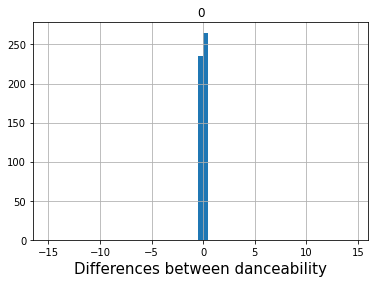

In [ ]:
differences_df.hist(bins = np.arange(-15,15,0.5))
plt.xlabel('Differences between danceability',fontsize=15)

In [ ]:
np.count_nonzero(differences <= observed_bpr_diff)

328

In [ ]:
observed_bpr_diff

0.01707626925530925

In [ ]:
out of 500 simulations 328 of them have crossed the observed difference indicating we have to support the null hypothesis as we have the 
observed difference = 0.017
after shuffling and performing the a/b test the observed value is well within the range of values 

therefore we accept the null hypothesis which states that the popularity increases as we increase danceability.
